In [544]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.datasets import load_digits

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD # LSA

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import confusion_matrix

X.shape: (1797, 64)  y.shape: (1797,)


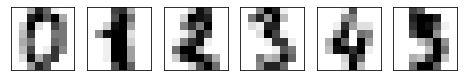

In [376]:
digits = load_digits()
X, y = digits.data, digits.target
print(f'X.shape: {X.shape}  y.shape: {y.shape}')
fig, axes = plt.subplots(1, 6, figsize=(8,5), subplot_kw={'xticks':[],'yticks':[]})
for ax, x in zip(axes.flat, X): ax.imshow(16 - x.reshape((8,8)), cmap='gray')

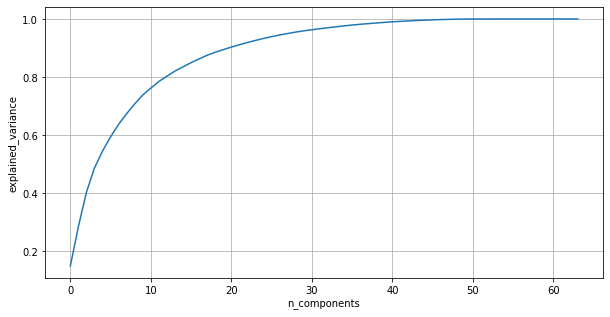

In [402]:
pca = PCA(n_components=64).fit(X)
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.xlabel('n_components')
plt.ylabel('explained_variance')
plt.grid();

X.shape: (1797, 64)
X_projected.shape: (1797, 10)
X_reconstructed.shape: (1797, 64)


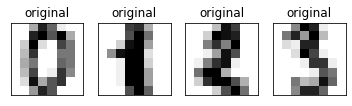

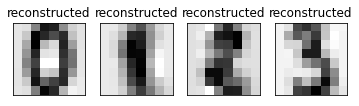

In [335]:
pca = PCA(n_components=10).fit(X)
X_projected = pca.transform(X)
X_reconstructed = pca.inverse_transform(X_projected)

print(f'X.shape: {X.shape}')
print(f'X_projected.shape: {X_projected.shape}')
print(f'X_reconstructed.shape: {X_reconstructed.shape}')

fig, axes = plt.subplots(1, 4, figsize=(6,5), subplot_kw={'xticks':[],'yticks':[]})
for ax, x in zip(axes.flat, X): 
    ax.set_title('original')
    ax.imshow(16 - x.reshape((8,8)), cmap='gray')

fig, axes = plt.subplots(1, 4, figsize=(6,5), subplot_kw={'xticks':[],'yticks':[]})
for ax, x in zip(axes.flat, X_reconstructed): 
    ax.set_title('reconstructed')
    ax.imshow(16 - x.reshape((8,8)), cmap='gray')

In [535]:
def scatter_2dim(X_projected, y, title):
    plt.figure(figsize=(8,5))
    plt.scatter(X_projected[:,0], X_projected[:,1], c=y)
    plt.title(title)
    plt.colorbar();

CPU times: user 155 ms, sys: 307 ms, total: 463 ms
Wall time: 143 ms


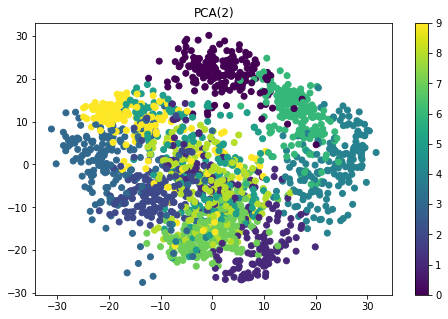

In [548]:
%%time
pca = PCA(n_components=2)
X_projected = pca.fit_transform(X)
scatter_2dim(X_projected, y, 'PCA(2)')

CPU times: user 154 ms, sys: 205 ms, total: 359 ms
Wall time: 114 ms


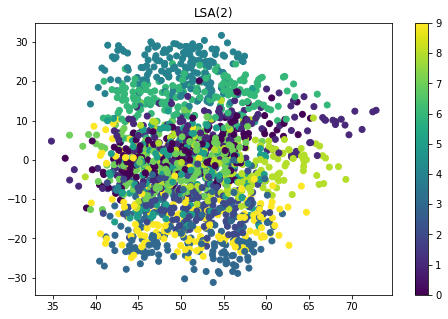

In [547]:
%%time
svd = TruncatedSVD(n_components=2)
X_projected = svd.fit_transform(X)
scatter_2dim(X_projected, y, 'LSA(2)')

CPU times: user 17.2 s, sys: 235 ms, total: 17.4 s
Wall time: 5.53 s


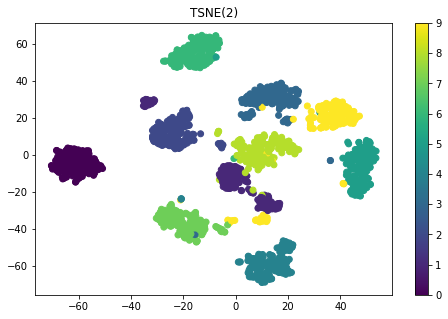

In [538]:
%%time
tsne = TSNE(n_components=2)
X_projected = tsne.fit_transform(X)
scatter_2dim(X_projected, y, 'TSNE(2)')

CPU times: user 18.9 s, sys: 563 ms, total: 19.4 s
Wall time: 6.59 s


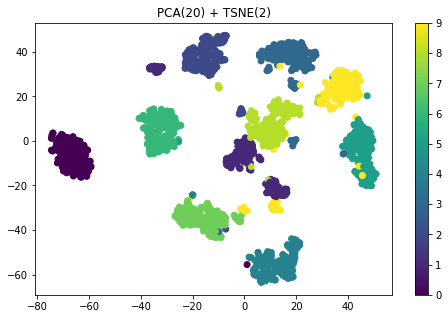

In [532]:
%%time
pca = PCA(n_components=20).fit(X)
X_projected = pca.transform(X)
tsne = TSNE(n_components=2)
X_projected = tsne.fit_transform(X_projected)
scatter_2dim(X_projected, y, 'PCA(20) + TSNE(2)')

CPU times: user 2min 23s, sys: 2min 36s, total: 5min
Wall time: 1min 19s


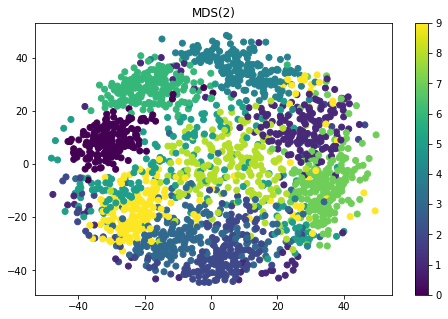

In [533]:
%%time
mds = MDS(n_components=2)
X_projected = mds.fit_transform(X)
scatter_2dim(X_projected, y, 'MDS(2)')

CPU times: user 405 ms, sys: 268 ms, total: 673 ms
Wall time: 314 ms


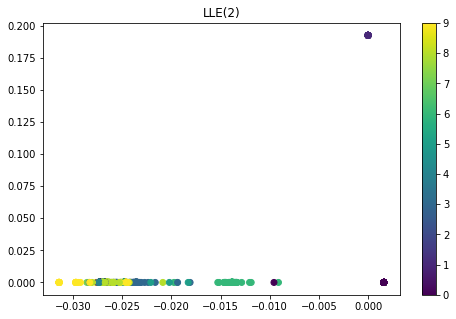

In [549]:
%%time
lle = LocallyLinearEmbedding(n_components=2)
X_projected = lle.fit_transform(X)
scatter_2dim(X_projected, y, 'LLE(2)')

CPU times: user 1.96 s, sys: 522 ms, total: 2.49 s
Wall time: 1.78 s


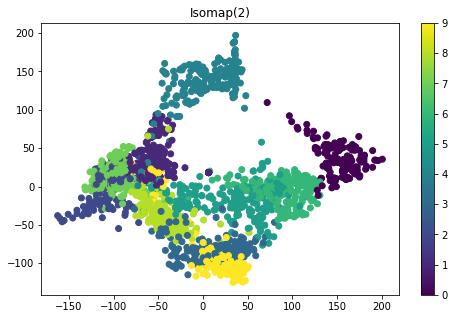

In [541]:
%%time
isomap = Isomap(n_components=2)
X_projected = isomap.fit_transform(X)
scatter_2dim(X_projected, y, 'Isomap(2)')

In [554]:
def show_report(X, y, X_projected, clusters):
    
    p = np.zeros_like(clusters)
    for c in range(10): p[clusters == c] = mode(y[clusters == c])[0][0]
    # for c in range(10): p[clusters==c] = np.argmax(np.bincount(y[clusters==c]))

    print(f'X.shape: {X.shape}')
    print(f'X_projected.shape: {X_projected.shape}')

    print(f'accuracy_score: {accuracy_score(y, p):.3f}')
    # print(f"precision_score: {precision_score(y, p, average='macro'):.3f}")
    # print(f"recall_score: {recall_score(y, p, average='macro'):.3f}")
    # print(f"f1_score: {f1_score(y, p, average='macro'):.3f}")
    
    print(f'silhouette_score: {silhouette_score(X_projected, clusters):.3f}')
    print(f'homogeneity_score: {homogeneity_score(y, p):.3f}')
    print(f'completeness_score: {completeness_score(y, p):.3f}')
    print(f'v_measure_score: {v_measure_score(y, p):.3f}')

    mat = confusion_matrix(y, p)
    plt.figure(figsize=(6,6))
    sns.heatmap(mat.T, annot=True, square=True, linewidths=.5, cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title('confusion matrix')

    fig, axes = plt.subplots(3, 4, figsize=(6,5))
    for c, ax in enumerate(axes.flat[:-2]):
        d = mode(y[clusters == c])[0][0]
        x = X[clusters == c].mean(axis=0)
        ax.set(title=d, xticks=[], yticks=[])
        ax.imshow(16 - x.reshape((8,8)), cmap='gray')
    for ax in axes.flat[-2:]: fig.delaxes(ax)
    fig.suptitle("clusters' centers");

X.shape: (1797, 64)
X_projected.shape: (1797, 64)
accuracy_score: 0.794
silhouette_score: 0.182
homogeneity_score: 0.740
completeness_score: 0.749
v_measure_score: 0.744
CPU times: user 2.65 s, sys: 2.19 s, total: 4.84 s
Wall time: 1.57 s


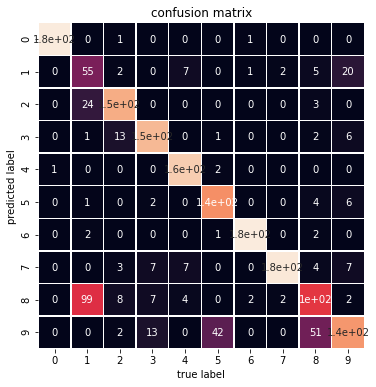

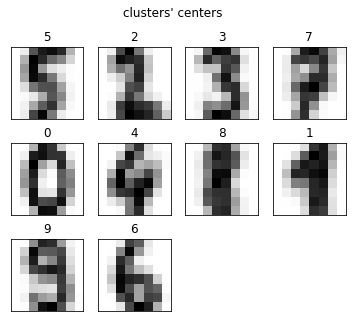

In [558]:
%%time
# KMeans
X_projected = X
km = KMeans(n_clusters=10, n_init=10)
clusters = km.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 30)
accuracy_score: 0.795
silhouette_score: 0.194
homogeneity_score: 0.741
completeness_score: 0.749
v_measure_score: 0.745
CPU times: user 2.42 s, sys: 2.04 s, total: 4.47 s
Wall time: 1.3 s


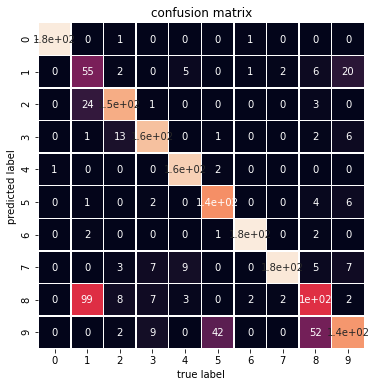

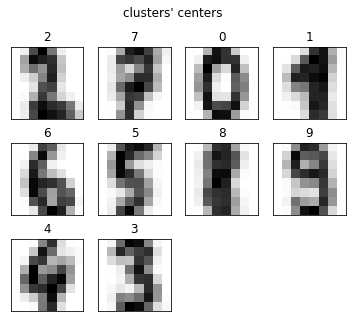

In [559]:
%%time
# PCA(30) + KMeans
pca = PCA(n_components=30).fit(X)
X_projected = pca.transform(X)
km = KMeans(n_clusters=10, n_init=10)
clusters = km.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 2)
accuracy_score: 0.899
silhouette_score: 0.634
homogeneity_score: 0.887
completeness_score: 0.897
v_measure_score: 0.892
CPU times: user 17.8 s, sys: 528 ms, total: 18.3 s
Wall time: 5.78 s


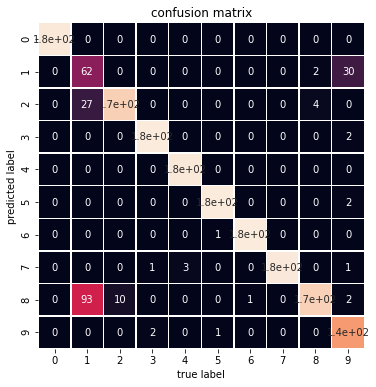

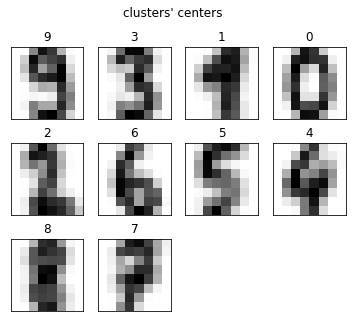

In [560]:
%%time
# t-SNE(2) + KMeans
tsne = TSNE(n_components=2)
X_projected = tsne.fit_transform(X)
km = KMeans(n_clusters=10, n_init=10)
clusters = km.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 2)
accuracy_score: 0.943
silhouette_score: 0.639
homogeneity_score: 0.909
completeness_score: 0.910
v_measure_score: 0.910
CPU times: user 17.6 s, sys: 571 ms, total: 18.1 s
Wall time: 5.76 s


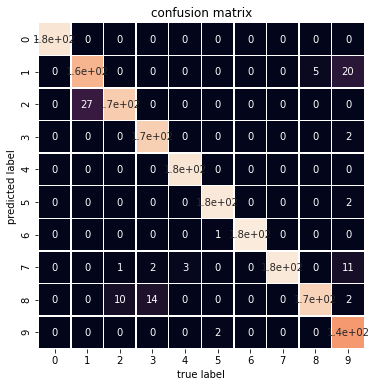

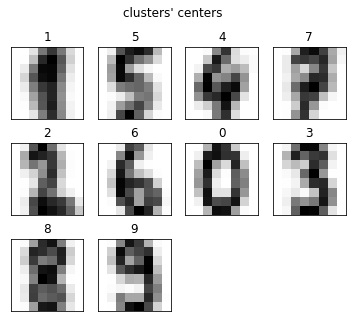

In [561]:
%%time
# t-SNE(2) + Agglomerative Clustering
tsne = TSNE(n_components=2)
X_projected = tsne.fit_transform(X)
ac = AgglomerativeClustering(n_clusters=10)
clusters = ac.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 2)
accuracy_score: 0.946
silhouette_score: 0.640
homogeneity_score: 0.912
completeness_score: 0.913
v_measure_score: 0.913
CPU times: user 18 s, sys: 924 ms, total: 18.9 s
Wall time: 6.03 s


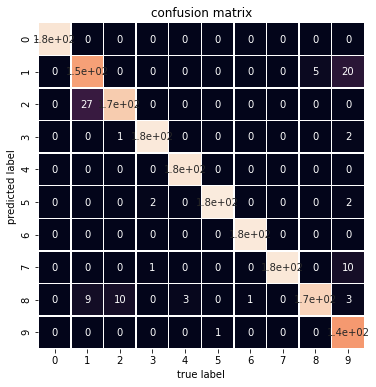

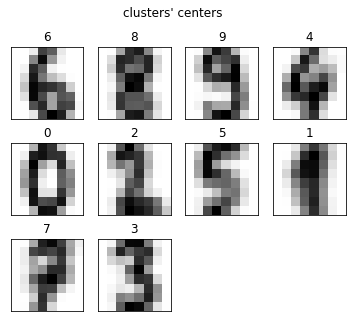

In [562]:
%%time
# PCA(40) + t-SNE(2) + KMeans
pca = PCA(n_components=40).fit(X)
X_projected = pca.transform(X)
tsne = TSNE(n_components=2)
X_projected = tsne.fit_transform(X_projected)
km = KMeans(n_clusters=10, n_init=10)
clusters = km.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 2)
accuracy_score: 0.676
silhouette_score: 0.433
homogeneity_score: 0.658
completeness_score: 0.703
v_measure_score: 0.680
CPU times: user 3.21 s, sys: 1.02 s, total: 4.23 s
Wall time: 2.28 s


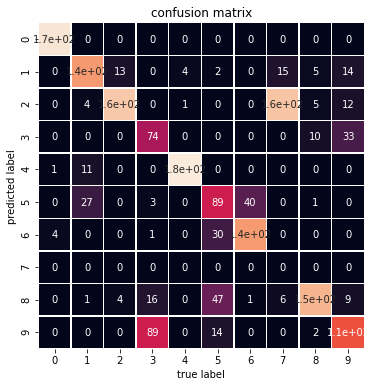

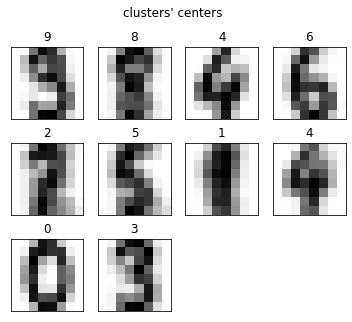

In [563]:
%%time
# Isomap(2) + KMeans
isomap = Isomap(n_components=2)
X_projected = isomap.fit_transform(X)
km = KMeans(n_clusters=10, n_init=10)
clusters = km.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 2)
accuracy_score: 0.687
silhouette_score: 0.428
homogeneity_score: 0.645
completeness_score: 0.703
v_measure_score: 0.673
CPU times: user 2.24 s, sys: 925 ms, total: 3.17 s
Wall time: 2 s


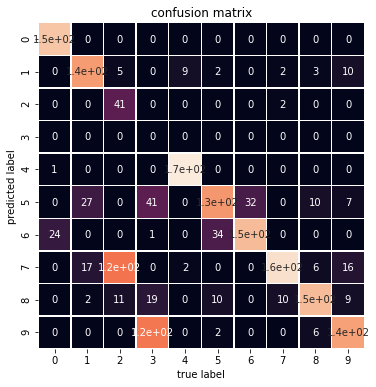

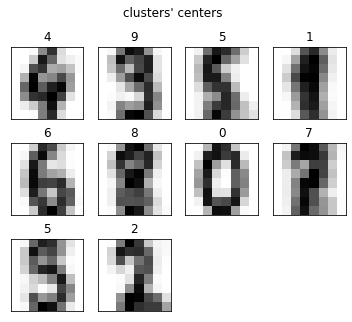

In [564]:
%%time
# Isomap(2) + Agglomerative Clustering
isomap = Isomap(n_components=2)
X_projected = isomap.fit_transform(X)
ac = AgglomerativeClustering(n_clusters=10)
clusters = ac.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 2)
accuracy_score: 0.889
silhouette_score: 0.631
homogeneity_score: 0.868
completeness_score: 0.884
v_measure_score: 0.876
CPU times: user 17.5 s, sys: 497 ms, total: 18 s
Wall time: 5.62 s


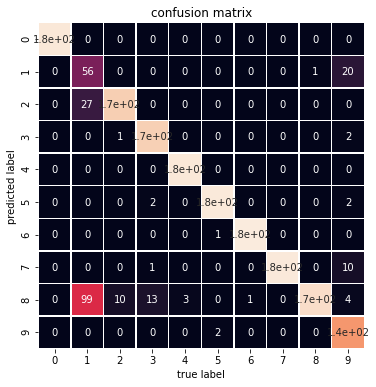

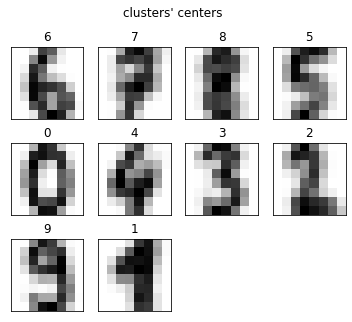

In [565]:
%%time
# t-SNE(2) + GMM
tsne = TSNE(n_components=2)
X_projected = tsne.fit_transform(X)
gmm = GaussianMixture(n_components=10)
clusters = gmm.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

In [515]:
# t-SNE(2) + DBSCAN
tsne = TSNE(n_components=2)
X_projected = pca.fit_transform(X)
dbscan = DBSCAN(eps=25, min_samples=32)
clusters = dbscan.fit_predict(X_projected) 
print(np.unique(clusters), np.sum(clusters == -1))
# show_report(X[clusters!=-1], y[clusters!=-1], X_projected[clusters!=-1], clusters[clusters!=-1])

[-1  0  1  2  3  4  5  6  7  8] 503
